# **Практика 6 (семинар). Описательные статистики**

[SmartLMS](https://edu.hse.ru/mod/quiz/view.php?id=1771938)

**Kickstarter** является одной из крупнейших и наиболее влиятельных краудфандинговых платформ в мире, предназначенной для творческого воплощения идей в реальность. Для аналитиков это данные о предпочтениях потребителей, анализируя которые можно выявить факторы, которые влияют на решение аудитории поддержать идею финансово. Рассмотрим датасет:


| Признак             | Описание                                |
| ------------------- | --------------------------------------- |
| `ID`  | уникальный идентификационный номер проекта. |
| `name`  | название проекта. |
| `main_category`  | основная категория проекта (например, "Фильм", "Музыка", "Технологии"). |
| `category`  | более узкая, конкретная категория внутри основной (например, "Короткометражный фильм", "Рок", "Смартфоны"). |
| `country`  | страна, из которой был запущен проект. |
| `duration`  | длительность проекта по сбору средств (в днях). |
| `state`  | успешность проекта (1-сумма собрана, 0-сумма не собрана). |
| `backers`  | количество людей (бекеров), поддержавших проект финансово. |
| `goal`  | целевая сумма, которую необходимо было собрать ($). |
| `pledged`  | фактически собранная сумма ($). |
| `rate_goal`  | показатель, показывающий отношение собранной суммы к целевой (`pledged` / `goal`) (в процентах) |

In [16]:
import pandas as pd
df = pd.read_csv('data/kickstarter.csv')

## **Задание 1**

### *Задание 1.1*

>*Укажите размер датафрейма*
>- количество наблюдений: <span style="color:green">306749</span>
>- количество признаков: <span style="color:green">11</span>

In [17]:
df.shape

(306749, 11)

### *Задание 1.2*

>*Укажите долю пропусков в*
>- количественном признаке: <span style="color:green">0.25</span>
>- категориальном признаке: <span style="color:green">0.37</span>
>
>*Ответы округлите до двух знаков. Пример ответа: 0.01*

In [18]:
df.isna().mean().round(2)

ID               0.00
name             0.00
main_category    0.00
category         0.00
country          0.37
duration         0.00
state            0.00
backers          0.25
goal             0.00
pledged          0.00
rate_goal        0.00
dtype: float64

### *Задание 1.3*

>*Замените пропуски в количественном признаке на подходящую меру центральной тенденции. Укажите стандартное отклонение количественного признака после замены пропусков. Ответ округлите до двух знаков.*
>
>***HINT**: чтобы подобрать МЦТ на замену пропусков посмотрите на распределение количественного признака*

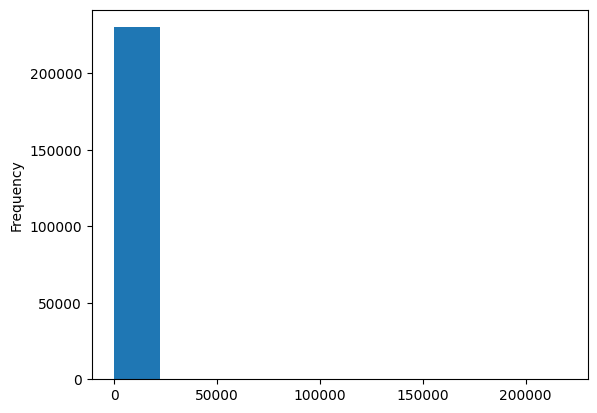

In [19]:
df['backers'].plot(kind='hist', bins=10);

In [20]:
df['backers'].fillna(df['backers'].median(), inplace=True)
df['backers'].std().round(2)

np.float64(899.53)

### *Задание 1.4*

>*Замените пропуски в категориальном признаке на подходящую меру центральной тенденции. Укажите дисперсию собранной суммы (`pledged`) для самой популярной категории (после замены пропусков). Ответ округлите до двух знаков.*

In [23]:
df['country'].fillna(df['country'].mode().item(), inplace=True)
df[df['country'] == df['country'].mode().item()]['pledged'].var().round(2)

np.float64(6114691.51)

---

## **Задание 2**

>*Рассчитайте заданные описательные статистики.*
>
>- *Найдите меру центральной тенденции для категорий проектов (`main_category`):*

In [26]:
df['main_category'].mode().item()

'Film & Video'

>- *Укажите долю успешных проектов (**1**; `state`):*

In [28]:
df['state'].mean().round(2)

np.float64(0.36)

>- *Рассчитайте меру вариативности для признака `country`:*

In [30]:
df['country'].nunique()

22

>- *Для продолжительности проектов (`duration`) рассчитайте меру центральной тенденции, которая тяготеет к выбросам:*

In [32]:
df['duration'].mean().round(2)

np.float64(34.09)

>- *На сколько в среднем цели проектов (`goal`) отклоняются от среднего значения:*

In [34]:
df['goal'].std().round(2)

np.float64(1641.73)

>- *Рассчитайте меру вариативности устойчивую к выбросам для собранных сумм (`pledged`):*

In [37]:
(df['pledged'].quantile(0.75) - df['pledged'].quantile(0.25)).round(2)

np.float64(3557.94)

>- *Для признака `rate_goal`, рассчитайте квадрат отклонения данных от среднего арифметического:*

In [39]:
df['rate_goal'].var().round(2)

np.float64(8403.61)

>- *Для количества доноров проекта (`backers`), рассчитайте меру вариативности, которая чувствительна к выбросам, но при этом не основывается на среднем арифметическом:*

In [40]:
df['backers'].max() - df['backers'].min()

np.float64(219382.0)

---

## **Задание 3**

>*По проектам в категории музыка (**Music**; `main_category`) и журналистика (**Journalism**; `main_category`) постройте сводную таблицу, где по строкам идут эти категории (`main_category`), а в столбцах среднее, медиана и стандартное отклонение собранных сумм (`pledged`) на проекты этих категорий. Проанализируйте построенную таблицу и дополните утверждения ниже.*
>
>- *В категории журналистика (`Journalism`) скорее всего есть проекты, которые собрали <span style="color:green">экстремально большие суммы</span> краудфандингом*
>- *В категории музыка (`Music`) скорее всего есть проекты, которые собрали <span style="color:green">экстремально маленькие суммы</span> краудфандингом*
>- *Большую вариативность собранных сумм имеют проекты связанные с <span style="color:green">Журналистикой (Journalism)</span>

In [42]:
df_flt = df[df['main_category'].isin(['Music', 'Journalism'])]
df_flt.groupby('main_category')['pledged'].agg(['mean', 'median', 'std'])

,mean,median,std
main_category,,,
Journalism,5343.665564,5222.916096,2614.374249
Music,6684.149294,7123.672785,2271.377867


---

## **Задание 4**

### *Задание 4.1*

>*Укажите какой из графиков показывает распределение*
>- цели сбора (`goal`):  <span style="color:green">B</span>
>- процента собранной суммы (`rate_goal`): <span style="color:green">A</span>

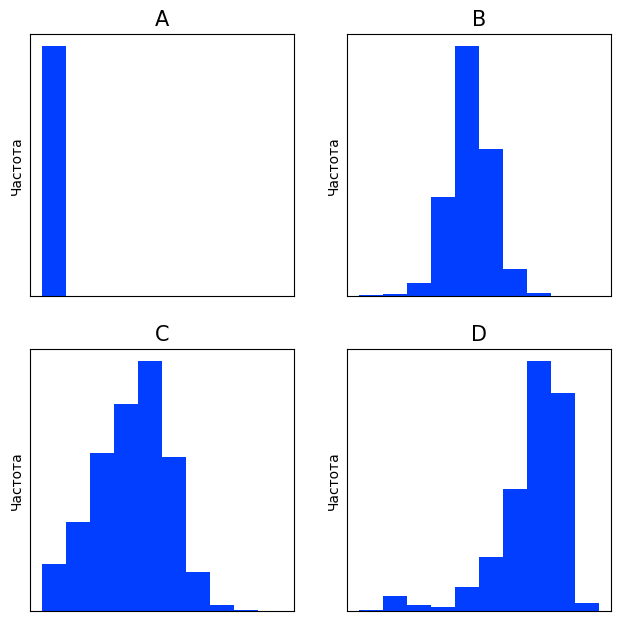

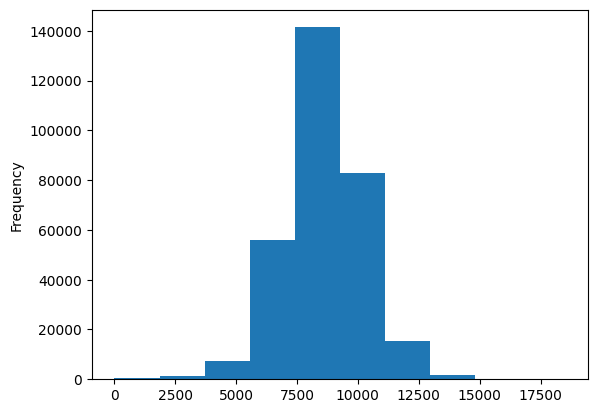

In [43]:
df['goal'].plot(kind='hist');

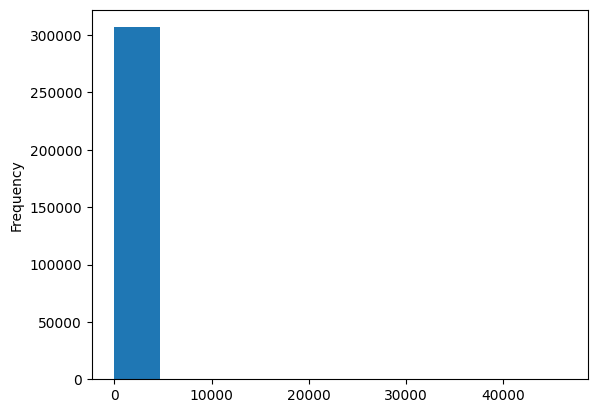

In [45]:
df['rate_goal'].plot(kind='hist');

### *Задание 4.2*

>*Заполните пропуски в утверждениях про распределения этих признаков:*
>
>- <span style="color:green">Цель сбора (goal)</span> имеет относительно симметричное распределение.*
>- *Скорее всего есть проекты, процент собранной суммы (`rate_goal`) которых* <span style="color:green">экстремально высокий</span>
>- *По гистограмме распределения цели сбора (`goal`), можно предположить, что среднее будет*: <span style="color:green">практически совпадать с медианой</span>
>- *По гистограмме распределения процента собранной суммы (`rate_goal`), можно предположить, что среднее будет*  <span style="color:green">больше медианы</span>

---

## **Задание 5**

### *Задание 5.1*

>*Укажите для какой категории (`category`) размах продолжительности сбора (`duration`) наименьший.*

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**
1. Постройте сводную таблицу, где по строкам идут категории (`category`), а в столбцах максимальное и минимальное значение продолжительности сбора (`duration`) для каждой категории.
2. В сводной таблице, создайте новый признак с размахом продолжительности сбора (`duration`), вычтя из максимума минимум.
3. Отсортируйте сводную таблицу с размахом и укажите для какой категории (`category`) размах продолжительности сбора (`duration`) наименьший.

</div>

In [47]:
df_cat = df.groupby('category')['duration'].agg(['min', 'max'])
df_cat['range'] = df_cat['max'] - df_cat['min']
df_cat.sort_values('range').head(1)

,min,max,range
category,,,
Taxidermy,20,45,25


**Ответ**: `Taxidermy`

### *Задание 5.2*

>*Укажите для какой категории (`category`) интерквартильный размах продолжительности сбора (`duration`) наибольший.*

<div style="background-color: rgba(0, 123, 255, 0.1); padding: 16px; border-radius: 8px;">

**АЛГОРИТМ РЕШЕНИЯ**

1. Постройте сводную таблицу, где по строкам идут категории (`category`), а в столбце первый квартиль продолжительности сбора (`duration`) для каждой категории.
2. Постройте сводную таблицу, где по строкам идут категории (`category`), а в столбце третий квартиль продолжительности сбора (`duration`) для каждой категории.
3. Найдите интерквартильный размах продолжительности сбора (`duration`) для каждой категории (`category`), вычтя одну сводную таблицу из другой.
4. Отсортируйте таблицу с интерквартильным размахом и укажите для какой категории (`category`) интерквартильный размах продолжительности сбора (`duration`) наибольший
</div>

In [55]:
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

df_cat = df.groupby('category')['duration'].agg(iqr)
df_cat.sort_values(ascending=False).head(3)

category
Literary Spaces    15.25
Robots             15.00
Architecture       15.00
Name: duration, dtype: float64

---

## **Задание 6**

### *Задание 6.1*

>*Рассчитайте границы ящика с усами для целей сбора (`goal`). Ответы округлите до двух знаков.*

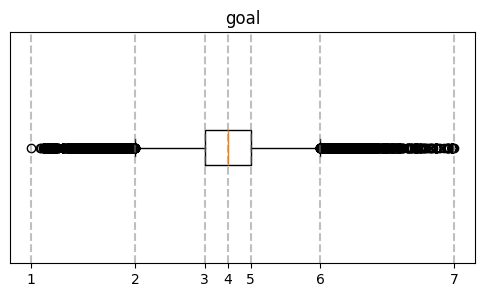

In [61]:
def q25(x): return x.quantile(0.25)     # левая граница ящика
def q75(x): return x.quantile(0.75)     # правая граница ящика
def iqr(x): return q75(x) - q25(x)      # длина ящика
def left_border(x): return q25(x) - 1.5 * iqr(x)    # левый ус
def right_border(x): return q75(x) + 1.5 * iqr(x)   # правый ус

df_goal_stat = df['goal'].agg(['min', left_border, q25, 'median', q75, right_border, 'max', iqr]).round(2)
df_goal_stat

min                 9.95
left_border      4564.01
q25              7601.40
median           8612.69
q75              9626.33
right_border    12663.72
max             18517.53
iqr              2024.93
Name: goal, dtype: float64

### *Задание 6.2*

>*Заполните пропуски в утверждениях про цель сбора (`goal`). Ответы округлите до двух знаков.*
>
>- Цель сбора менее <span style="color:green">4564.01</span> считается экстремально низкой.
>- 75% проектов поставили цель сбора более <span style="color:green">7601.40</span>
>- 50% центральных наблюдений лежат в диапазоне <span style="color:green">2024.93</span>
>- Половина проектов ставят целью сбора сумму менее <span style="color:green">8612.69</span>
>- Наибольшая сумма сбора составляет <span style="color:green">18517.53</span>

### *Задание 6.3*

>*Удалите выбросы из данных по признаку цель сбора (`goal`) методом 1.5xIQR. В ответ укажите количество наблюдений в данных после удаления выбросов.*

**Данные без выбросов по признаку `goal` сохраните в переменную `df_clean`. В следующем задании вы должны работать с `df_clean`.**

In [65]:
df_clean = df[(df['goal'] > df_goal_stat['left_border']) & (df['goal'] < df_goal_stat['right_border'])]
df_clean.shape[0]

301279

---

## **Задание 7**

>*Будем считать, что выбросами считаются наблюдения, которые отличаются от среднего арифметического на 2 стандартных отклонения и более. Определите, сколько наблюдений считаются выбросами по признаку `pledged`.*

In [73]:
left = df_clean['pledged'].mean() - 2 * df_clean['pledged'].std()
right = df_clean['pledged'].mean() + 2 * df_clean['pledged'].std()

df_clean[(df_clean['pledged'] < left) | (df_clean['pledged'] > right)].shape[0]

13715

---